<a href="https://colab.research.google.com/github/GaneshMac/3253-Machine-Learning/blob/main/Copy_of_W3_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

**upgraded pandas excel processing xlrd-2**

In [4]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


### Classification

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

- Explore the data
- Make sure you build a full data pipeline
- Do you require any data pre-processing? Are all the features useful? (Use only raw features)
- set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)
- Follow similar procedure as the one for week 2 (End-to-end Machine Learning Project). Remember apendix B
- Study the ROC Curve, decide threshold
- Use 2 classifiers.
    - Random Forest
        - tune only: n_estimators: {3, 4, 6, 7, 10, 20, 50, 100} 
    - KNN Classfier 
        - tune only: n_neighbors: {3, 4, 5, 7, 10, 20, 50} 
    - Which one performs better in the cross validation?
    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Cross-validation with 4-folds.

- Other paramenters -> Use default

Notes:
  - Make your code modular, the second part of the assignmet you will have to repeat. 
  - Include documentation for your code 

In [2]:
### Ganeshs code below

## Feel free to use multiple cells

df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", 
                   sheet_name = 0, skiprows= 1, header = 0)

**Basic data checks like head, tail, info and describe**

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

**No NA rows as all have values as found from describe**

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**This value count shows that data in not balanced**

In [7]:
df["default payment next month"].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

**Plotting histograms to analyse the data**

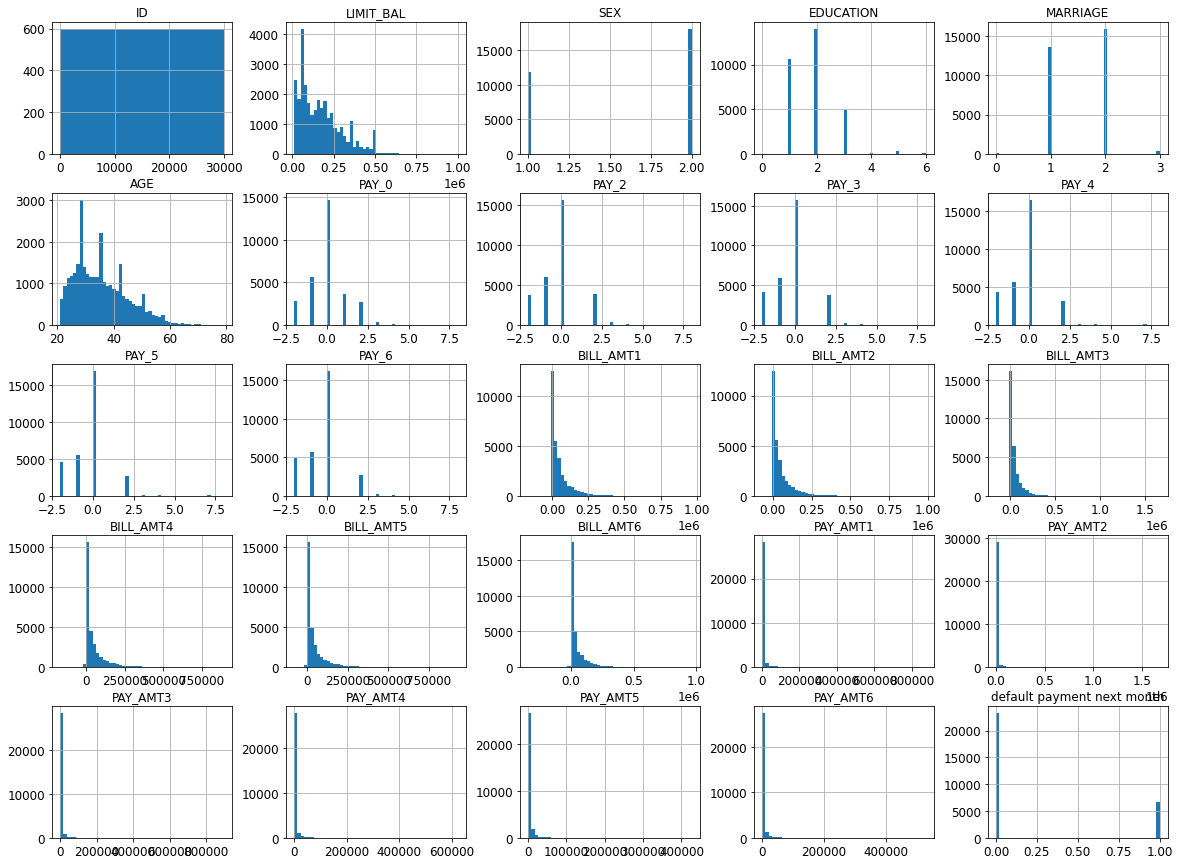

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

**For value in cell  3330 as in assignment question**

In [9]:
df.iloc[3330]

ID                             3331
LIMIT_BAL                     50000
SEX                               1
EDUCATION                         2
MARRIAGE                          2
AGE                              29
PAY_0                             1
PAY_2                             2
PAY_3                             0
PAY_4                             0
PAY_5                             0
PAY_6                             0
BILL_AMT1                     49612
BILL_AMT2                     48546
BILL_AMT3                     49157
BILL_AMT4                     49890
BILL_AMT5                     48941
BILL_AMT6                     49940
PAY_AMT1                          0
PAY_AMT2                       1900
PAY_AMT3                       1333
PAY_AMT4                          0
PAY_AMT5                        999
PAY_AMT6                          0
default payment next month        0
Name: 3330, dtype: int64

**Define target varaible that is required as output of classification model**

In [10]:
TARGET = "default payment next month"

In [11]:
df[TARGET]

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64

**Removing Index as its not a predictor** 

In [12]:
df=df.drop('ID',axis=1)

**Identify numerical and categorical data**

In [14]:

columns_predictors = [col for col in df.columns if col not in [TARGET]]
columns_categorical = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
columns_numerical = [col for col in columns_predictors if col not in columns_categorical]
print(f"TARGET: {TARGET}")
print(f"columns_predictors: {columns_predictors}")
print(f"columns_categorical: {columns_categorical}")
print(f"columns_numerical: {columns_numerical}")

TARGET: default payment next month
columns_predictors: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
columns_categorical: ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
columns_numerical: ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [15]:
X = df[columns_predictors]
y = df[TARGET]
display(X)
display(y)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64

In [16]:
df[columns_predictors]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


**Train test split** 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123) 
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (24000, 23)
X_test.shape: (6000, 23)
y_train.shape: (24000,)
y_test.shape: (6000,)


In [19]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
19682,200000,2,2,1,46,0,0,0,0,0,...,104137,103422,95206,65108,3692,5000,3300,2500,2930,1500
11062,120000,2,1,1,32,-1,-1,-1,-1,-1,...,326,476,802,326,652,326,476,802,0,326
197,20000,2,1,2,22,0,0,0,0,-1,...,19065,8332,18868,19247,1500,1032,541,20000,693,1000
23620,100000,2,5,2,34,0,0,0,0,0,...,87244,23181,7721,3219,5004,3811,3002,4000,3219,1864
26031,290000,2,2,2,29,0,0,0,0,0,...,8389,8770,9145,10016,1130,1502,1300,500,1000,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,380000,2,2,1,37,0,0,0,0,0,...,13277,14291,15949,15556,1204,1300,1242,1900,0,3000
17730,360000,2,1,1,54,1,-2,-2,-1,0,...,0,2580,2580,6941,0,0,2580,0,6941,0
28030,50000,2,3,1,29,0,0,0,0,0,...,46777,39420,8824,9009,2002,2000,1530,1000,327,329
15725,30000,2,2,2,21,0,0,0,0,0,...,29435,30841,29434,16565,2000,2000,2000,1765,331,0


In [20]:
X_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
25665,40000,2,2,2,26,-1,0,0,0,-1,...,13600,0,44024,18697,1300,1000,0,22373,680,10000
16464,80000,2,3,1,59,0,0,0,0,0,...,53169,50875,50372,49470,3212,2106,2000,1603,1903,2006
22386,170000,2,1,2,30,2,2,2,2,2,...,161487,157577,168094,170922,6800,6500,0,13000,5500,1000
10149,200000,2,2,1,41,-2,-2,-2,-2,-2,...,0,0,0,0,742,0,0,0,0,0
8729,50000,1,2,1,43,0,0,0,0,0,...,9044,9225,9417,9617,1140,1150,331,341,356,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9940,160000,1,1,1,51,0,0,0,2,2,...,2623,2457,4912,3669,1331,2473,0,2500,0,0
11351,70000,1,3,2,53,0,0,0,0,0,...,15787,16100,16437,16764,1554,1263,576,596,600,622
29732,10000,1,2,1,45,1,2,2,2,2,...,10062,6267,-610,-220,0,4312,0,0,780,1150
9088,50000,1,3,0,50,0,0,0,-1,-1,...,0,3400,2769,0,2266,0,3400,2769,1700,0


In [21]:
y_train

19682    0
11062    1
197      0
23620    0
26031    0
        ..
28636    0
17730    0
28030    1
15725    0
19966    0
Name: default payment next month, Length: 24000, dtype: int64

In [22]:
y_test

25665    0
16464    0
22386    1
10149    1
8729     0
        ..
9940     1
11351    0
29732    0
9088     0
23862    0
Name: default payment next month, Length: 6000, dtype: int64

**Pipelines creation code**

In [34]:
from sklearn.pipeline import Pipeline #each pipeline can have multiple steps
from sklearn.compose import ColumnTransformer #for selecting specific columns and transforming them with individual pipelines
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder #specific transformations we want to use in our pipelines

pipeline_categorical = Pipeline([
  ('onehot', OneHotEncoder()),
])

pipeline_numerical = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0,1))),
])

pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical),
  ("numerical", pipeline_numerical, columns_numerical),
])

In [35]:
X_train[columns_categorical]

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
19682,2,2,1,0,0,0,0,0,0
11062,2,1,1,-1,-1,-1,-1,-1,2
197,2,1,2,0,0,0,0,-1,0
23620,2,5,2,0,0,0,0,0,-1
26031,2,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
28636,2,2,1,0,0,0,0,0,2
17730,2,1,1,1,-2,-2,-1,0,-1
28030,2,3,1,0,0,0,0,0,0
15725,2,2,2,0,0,0,0,0,0


In [36]:
X_train[columns_numerical]

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
19682,200000,46,106651,103173,104137,103422,95206,65108,3692,5000,3300,2500,2930,1500
11062,120000,32,3556,326,326,476,802,326,652,326,476,802,0,326
197,20000,22,18553,19446,19065,8332,18868,19247,1500,1032,541,20000,693,1000
23620,100000,34,91674,91348,87244,23181,7721,3219,5004,3811,3002,4000,3219,1864
26031,290000,29,7324,8174,8389,8770,9145,10016,1130,1502,1300,500,1000,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,380000,37,13415,14381,13277,14291,15949,15556,1204,1300,1242,1900,0,3000
17730,360000,54,0,0,0,2580,2580,6941,0,0,2580,0,6941,0
28030,50000,29,47194,48381,46777,39420,8824,9009,2002,2000,1530,1000,327,329
15725,30000,21,28409,28530,29435,30841,29434,16565,2000,2000,2000,1765,331,0


In [37]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
19682,200000,2,2,1,46,0,0,0,0,0,...,104137,103422,95206,65108,3692,5000,3300,2500,2930,1500
11062,120000,2,1,1,32,-1,-1,-1,-1,-1,...,326,476,802,326,652,326,476,802,0,326
197,20000,2,1,2,22,0,0,0,0,-1,...,19065,8332,18868,19247,1500,1032,541,20000,693,1000
23620,100000,2,5,2,34,0,0,0,0,0,...,87244,23181,7721,3219,5004,3811,3002,4000,3219,1864
26031,290000,2,2,2,29,0,0,0,0,0,...,8389,8770,9145,10016,1130,1502,1300,500,1000,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,380000,2,2,1,37,0,0,0,0,0,...,13277,14291,15949,15556,1204,1300,1242,1900,0,3000
17730,360000,2,1,1,54,1,-2,-2,-1,0,...,0,2580,2580,6941,0,0,2580,0,6941,0
28030,50000,2,3,1,29,0,0,0,0,0,...,46777,39420,8824,9009,2002,2000,1530,1000,327,329
15725,30000,2,2,2,21,0,0,0,0,0,...,29435,30841,29434,16565,2000,2000,2000,1765,331,0


In [38]:
pipeline_categorical.fit_transform(X_train[columns_categorical]).toarray().shape

(24000, 77)

**Apply the pieplines**

In [39]:
pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")

X_train_transformed.shape: (24000, 91)
X_test_transformed.shape: (6000, 91)


**Random forest regressor:Train an ML model on the transformed training set**

In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,random_state=123)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(random_state=123)

**prediction of test values**

In [42]:


y_pred = model.predict(X_test_transformed)




In [43]:
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [44]:
y_test

25665    0
16464    0
22386    1
10149    1
8729     0
        ..
9940     1
11351    0
29732    0
9088     0
23862    0
Name: default payment next month, Length: 6000, dtype: int64

**evaulate the model for random forest Classifier**

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print(f"accuracy_score: {accuracy_score(y_test, y_pred)}")
print(f"precision_score: {precision_score(y_test, y_pred)}")
print(f"recall_score: {recall_score(y_test, y_pred)}")
print(f"f1_score: {f1_score(y_test, y_pred)}")
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred)}")

accuracy_score: 0.8175
precision_score: 0.6307884856070087
recall_score: 0.38650306748466257
f1_score: 0.4793152639087018
roc_auc_score: 0.6618418233505085


**Full evaluation for  KNN classifier  for  a set of neighbors looks through as required in assignment**

In [51]:
num_neighbors= {3, 4, 5, 7, 10, 20, 50}
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
for i in num_neighbors:
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train_transformed, y_train)
  y_pred = neigh.predict(X_test_transformed)
  print("When num_neighbors is = " ,i)
  print(f"accuracy_score: {accuracy_score(y_test, y_pred)}")
  print(f"precision_score: {precision_score(y_test, y_pred)}")
  print(f"recall_score: {recall_score(y_test, y_pred)}")
  print(f"f1_score: {f1_score(y_test, y_pred)}")
  print(f"roc_auc_score: {roc_auc_score(y_test, y_pred)}")
  print("-------------------------------------------------------------------")



When num_neighbors is =  3
accuracy_score: 0.7735
precision_score: 0.473633748801534
recall_score: 0.37883435582822084
f1_score: 0.42096293140178953
roc_auc_score: 0.6309631745069554
-------------------------------------------------------------------
When num_neighbors is =  4
accuracy_score: 0.7983333333333333
precision_score: 0.5778145695364238
recall_score: 0.26763803680981596
f1_score: 0.36582809224318663
roc_auc_score: 0.6066682517950271
-------------------------------------------------------------------
When num_neighbors is =  5
accuracy_score: 0.797
precision_score: 0.5495391705069125
recall_score: 0.36579754601226994
f1_score: 0.4392265193370166
roc_auc_score: 0.6412675975376512
-------------------------------------------------------------------
When num_neighbors is =  7
accuracy_score: 0.805
precision_score: 0.58375
recall_score: 0.3581288343558282
f1_score: 0.4439163498098859
roc_auc_score: 0.6436087101932463
-----------------------------------------------------------------

**Full evaluation for  random forest classifier  for  a set of num estimators as in assignment**


In [49]:
num_estimators = {3, 4, 6, 7, 10, 20, 50, 100}
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
for i in num_estimators:
  model = RandomForestClassifier(n_estimators=i,random_state=123)
  model.fit(X_train_transformed, y_train)
  y_pred = model.predict(X_test_transformed)
  print("When num_estimators is = " ,i)
  print(f"accuracy_score: {accuracy_score(y_test, y_pred)}")
  print(f"precision_score: {precision_score(y_test, y_pred)}")
  print(f"recall_score: {recall_score(y_test, y_pred)}")
  print(f"f1_score: {f1_score(y_test, y_pred)}")
  print(f"roc_auc_score: {roc_auc_score(y_test, y_pred)}")
  print("-------------------------------------------------------------------")

When num_estimators is =  3
accuracy_score: 0.7721666666666667
precision_score: 0.4722466960352423
recall_score: 0.4110429447852761
f1_score: 0.43952439524395237
roc_auc_score: 0.6417437892580554
-------------------------------------------------------------------
When num_estimators is =  4
accuracy_score: 0.7908333333333334
precision_score: 0.5361890694239291
recall_score: 0.27837423312883436
f1_score: 0.36648157496214034
roc_auc_score: 0.6057544078761719
-------------------------------------------------------------------
When num_estimators is =  100
accuracy_score: 0.8175
precision_score: 0.6307884856070087
recall_score: 0.38650306748466257
f1_score: 0.4793152639087018
roc_auc_score: 0.6618418233505085
-------------------------------------------------------------------
When num_estimators is =  6
accuracy_score: 0.7983333333333333
precision_score: 0.5683139534883721
recall_score: 0.29984662576687116
f1_score: 0.392570281124498
roc_auc_score: 0.6183006553025157
----------------------

#### Conclusions?

In [ ]:
##Both KNN Classifier and RandomForestClassifier seem to have the similar f1_score but randomforest  seems to be having higher and better overall numbers 
##for all the measureable  parameters
###Higher number of num_estimators doesn't mean better estimations and same is the case for num_neighbors.

Explain your results and choices

**Cross validation for KNN classifier**

In [54]:
from sklearn.model_selection import cross_val_score

neigh_scores = cross_val_score(neigh, X_train_transformed, y_train,
                                scoring="recall", cv=4)


In [55]:
neigh_scores

array([0.32858215, 0.31957989, 0.32258065, 0.3315829 ])

**Cross validation for random classifier**

In [56]:
from sklearn.model_selection import cross_val_score

random_forest_scores = cross_val_score( model, X_train_transformed, y_train,
                                scoring="recall", cv=4)


In [57]:
random_forest_scores

array([0.33908477, 0.34433608, 0.35708927, 0.34433608])

In [ ]:
#### The recall of random_forest Classifier is better than KNN Classifier using cross validation for 4 folds

Q2. (Optional) Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion. 

### Conclusions
